# visualization with Seaborn
## C1
The plt provises basic plot type

In [3]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [5]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)

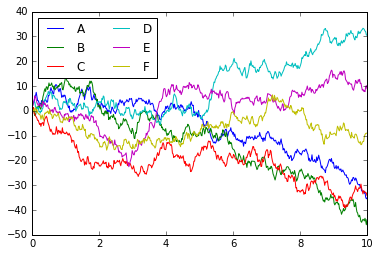

In [21]:
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## C2
The seaborn provides high-level commands to create a varity of plot types for statistical data exploration.

In [23]:
import seaborn as sns
sns.set()  # Set aesthetic parameters in one step.

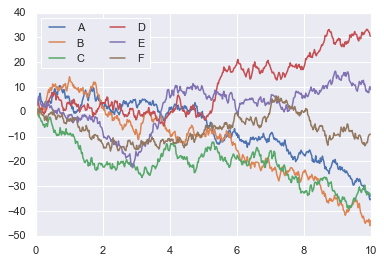

In [24]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Histogram, Kernel Density Estimation, densities.
KDE: estimate the probability density function of a random variable.

In [25]:
data1 = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data1, columns=['x', 'y'])

In [35]:
data

,x,y
0,-1.004989,0.250222
1,1.759166,0.420739
2,0.740849,0.891523
3,-1.418326,-0.885579
4,1.295786,1.191186
...,...,...
1995,-1.852367,-0.179227
1996,0.984047,0.354768
1997,3.511815,1.099111
1998,1.394391,0.593043


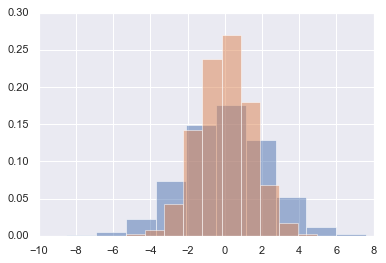

In [30]:
for col in 'xy':
    plt.hist(data[col],normed=True, alpha=0.5)

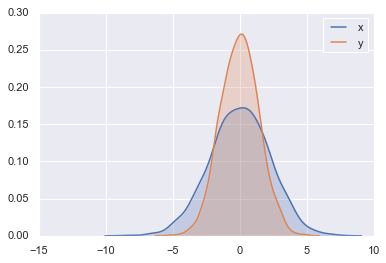

In [31]:
# Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with sns.kdeplot
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

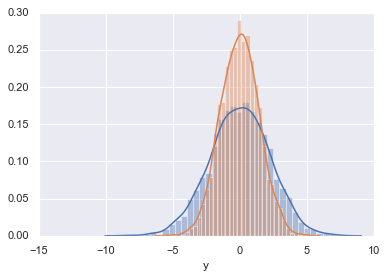

In [32]:
# Histograms and KDE can be combined using distplot:
sns.distplot(data['x'])
sns.distplot(data['y']);

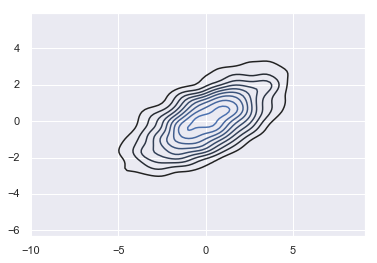

In [36]:
# If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:
sns.kdeplot(data)

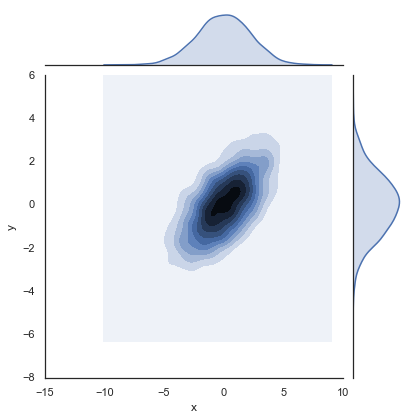

In [37]:
# We can see the joint distribution and the marginal distributions together using sns.jointplot
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

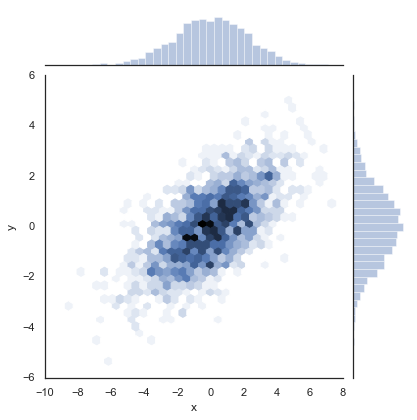

In [38]:
# There are other parameters that can be passed to jointplot—for example, we can use a hexagonally based histogram instead:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')


## C3 pair plots
It is useful to generalize joint plots to dataset of larger dimensions in exploring correlations.


In [40]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


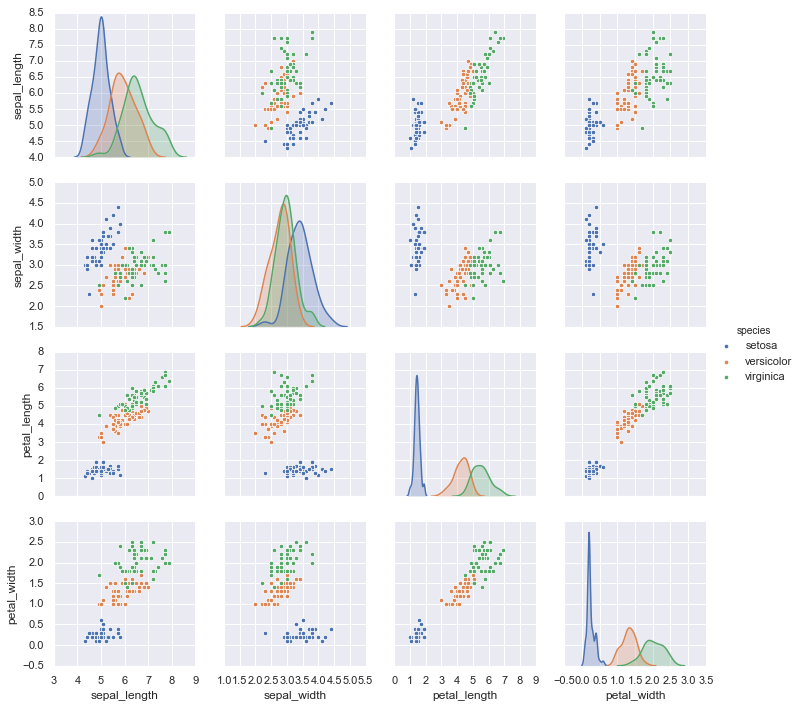

In [42]:
# Visualizing the multidimensional relationships among the samples
sns.pairplot(iris, hue='species', size=2.5);

## C4 faceted histograms
histograms of subset

In [43]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']


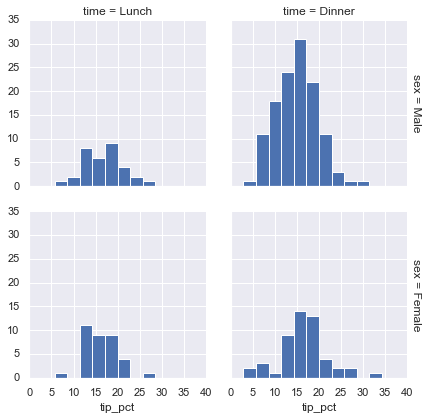

In [46]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## C4 Factor plots
view the distribution of a parameter within bins defined by any other paramter.

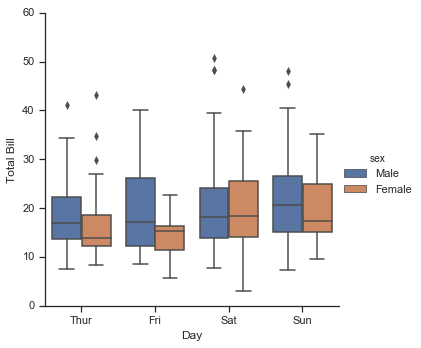

In [48]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

## C4 Joint distributions
similar to the pairplot

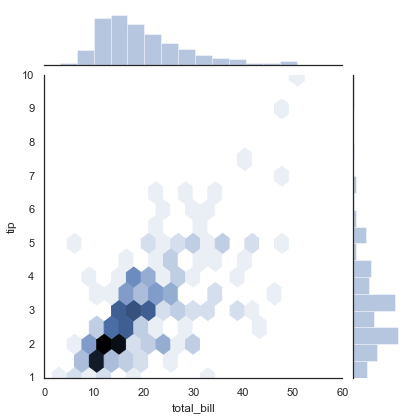

In [49]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

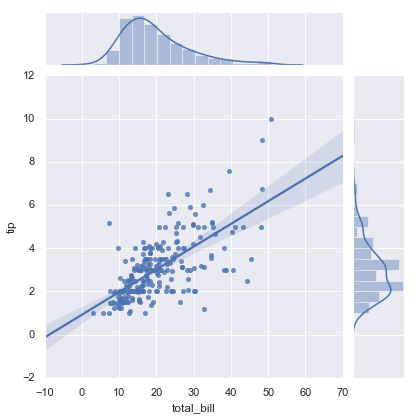

In [50]:
# The joint plot can even do some automatic kernel density estimation and regression:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

## C5 Bar plots


In [51]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


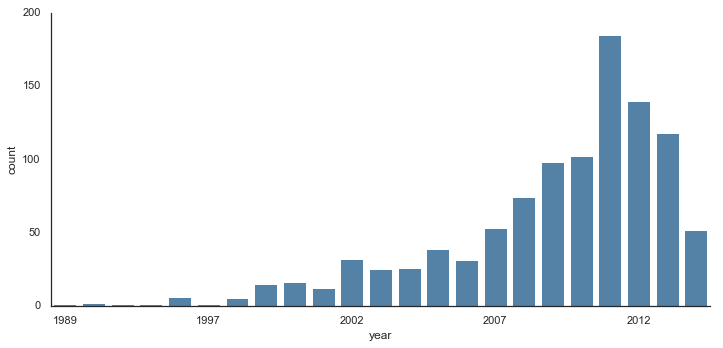

In [56]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

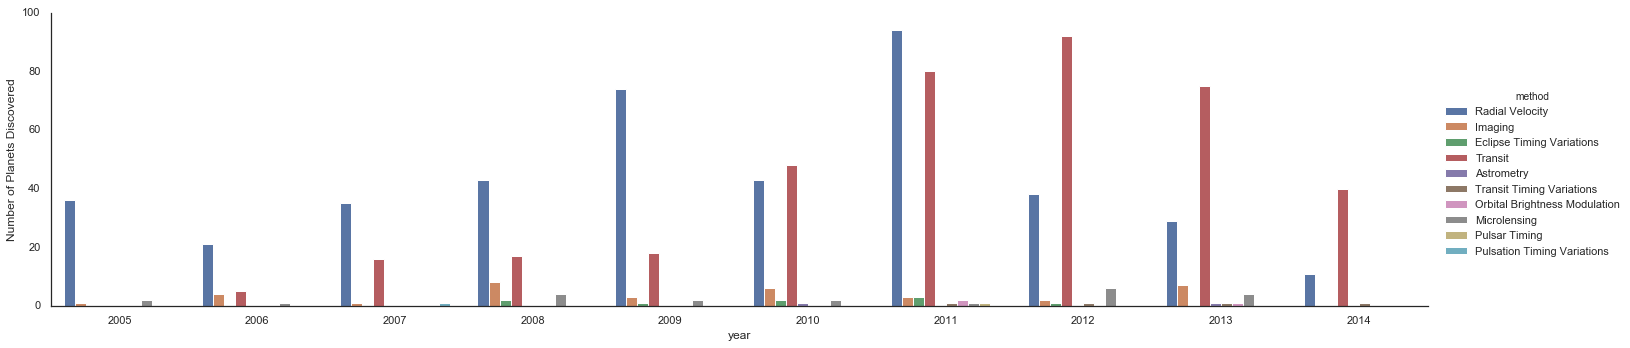

In [60]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2005, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example
Exploring Marathon Finishing Times

In [62]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0   441k      0  0:00:01  0:00:01 --:--:--  441k


In [63]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [65]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [76]:
# convert times
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [77]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [79]:
# add columns and give the times in seconds:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


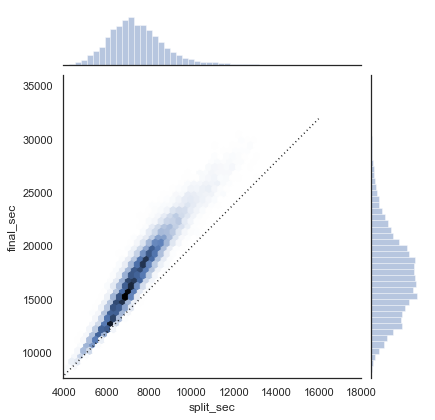

In [82]:
# joint plot
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')


In [83]:
# Let's create another column in the data, the split fraction, 
# which measures the degree to which each runner negative-splits or positive-splits the race:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


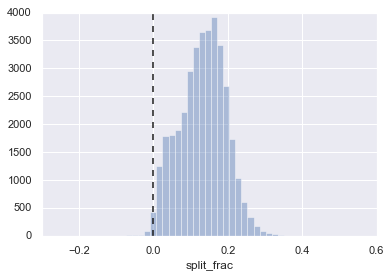

In [84]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [85]:
sum(data.split_frac < 0)

251

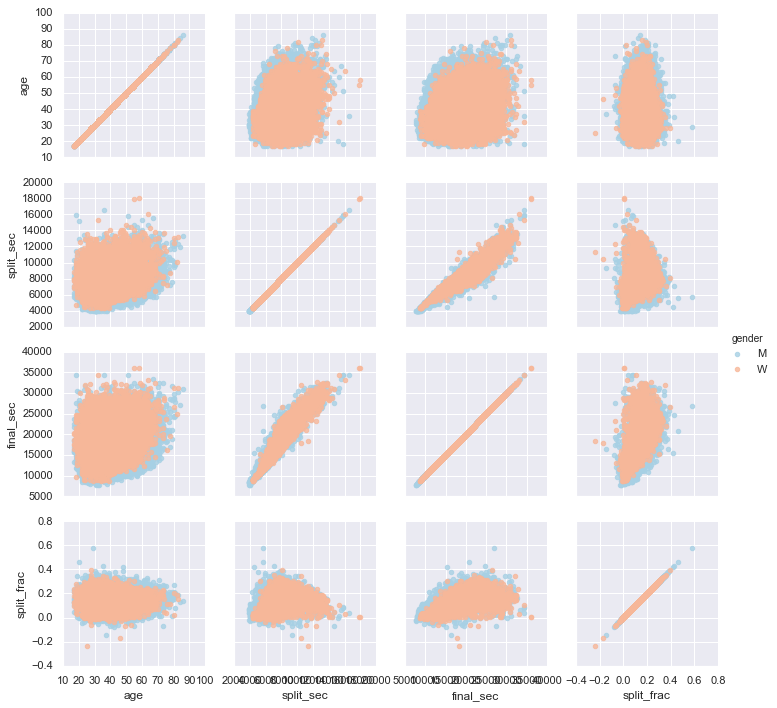

In [86]:
# pair plots
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

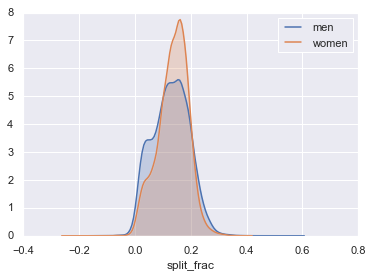

In [87]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

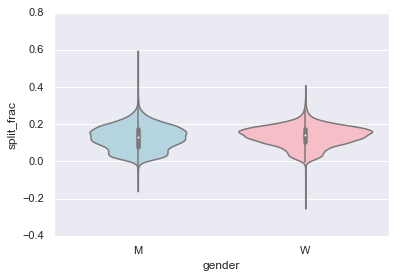

In [88]:
# violin plot
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [89]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


In [90]:
men = (data.gender == 'M')
women = (data.gender == 'W')

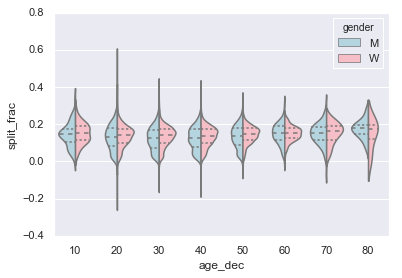

In [95]:
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [96]:
(data.age > 80).sum()

7

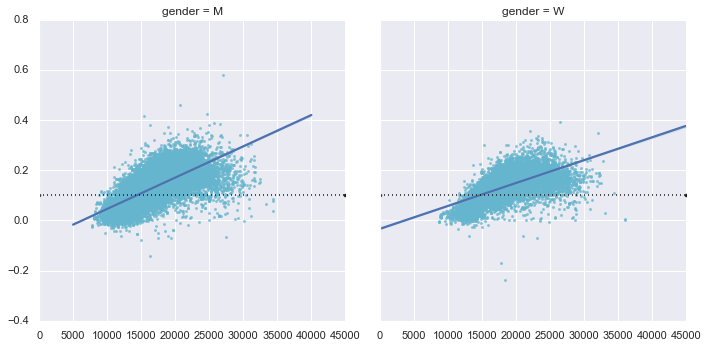

In [97]:
# linear regression
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.